## Problem Statement

Build a prdictive model and find out the sales of each product at a particular store

## Hypothesis Generation

1.Item Identifire:- It is help to find the item
2.Item Weight:-It's helps us to how much weight of the item 
3.Item Fat Content:- How much fat content in items 
4.Item Type:-How much type of item is aviable 
5.Item MRP:-Price of the item 
6.Outlet Identifire:-Is the product is outlet

### Load Libraries

In [112]:
import os 
import numpy as np 
import pandas as pd 
import warnings  
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2 
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score as CVS


In [113]:
train_data = pd.read_csv('/home/sid/Downloads/9961_14084_bundle_archive/Train.csv')
test_data = pd.read_csv('/home/sid/Downloads/9961_14084_bundle_archive/Test.csv')

### Data Structure and Content

In [114]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [115]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [116]:
print(f'Training Dataset (row, col): {train_data.shape} \n\nTesting Dataset (row, col): {test_data.shape}')

Training Dataset (row, col): (8523, 12) 

Testing Dataset (row, col): (5681, 11)


In [117]:
train_data['source'] = 'train'
test_data['source'] = 'test'
data = pd.concat([train_data, test_data], ignore_index=True)
print('After Combining Datasets: ', data.shape)

After Combining Datasets:  (14204, 13)


In [118]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [119]:
# Summary of Dataset Train
data.describe(include=[object, np.number])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
count,14204,11765.000000,14204,14204.000000,14204,14204.000000,14204,14204.000000,10188,14204,14204,8523.000000,14204
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN,2
top,FDU15,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN,train
freq,10,NaN,8485,NaN,2013,NaN,1559,NaN,4655,5583,9294,NaN,8523
mean,NaN,12.792854,NaN,0.065953,NaN,141.004977,NaN,1997.830681,NaN,NaN,NaN,2181.288914,NaN
std,NaN,4.652502,NaN,0.051459,NaN,62.086938,NaN,8.371664,NaN,NaN,NaN,1706.499616,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000,NaN
25%,NaN,8.710000,NaN,0.027036,NaN,94.012000,NaN,1987.000000,NaN,NaN,NaN,834.247400,NaN
50%,NaN,12.600000,NaN,0.054021,NaN,142.247000,NaN,1999.000000,NaN,NaN,NaN,1794.331000,NaN
75%,NaN,16.750000,NaN,0.094037,NaN,185.855600,NaN,2004.000000,NaN,NaN,NaN,3101.296400,NaN


In [120]:
# Lets check missing Values
print('Train:\n')
print('Missing Values by Count: \n\n',
      data.isnull().sum().sort_values(ascending=False),'\n\nMissing Values by %:\n\n',
      data.isnull().sum().sort_values(ascending=False)/data.shape[0] * 100)

Train:

Missing Values by Count: 

 Item_Outlet_Sales            5681
Outlet_Size                  4016
Item_Weight                  2439
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
source                          0
dtype: int64 

Missing Values by %:

 Item_Outlet_Sales            39.995776
Outlet_Size                  28.273726
Item_Weight                  17.171219
Item_Identifier               0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
source          

In [121]:
# Lets check and imputate missing values
print('Missing Values in Outlet_Size :\n\n',data.Outlet_Size.value_counts())
print('\nMissing Values in Item_Weight :\n\n',data.Item_Weight.value_counts())

Missing Values in Outlet_Size :

 Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Missing Values in Item_Weight :

 17.600    135
12.150    127
10.500    123
13.650    115
11.800    113
         ... 
7.640       7
5.905       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64


In [122]:
# Filling Outlet Size  missing values.
# data['Outlet_Size'] = data.Outlet_Size.fillna(data.Outlet_Size.dropna().mode()[0])
# # Checking if we filled all values
# print( 'Missing values after filling:' ,data.Outlet_Size.isnull().sum())

print('Missing Values in Item_Weight: ', len(data[data.Outlet_Size.isnull()]))
miss_values = data.Outlet_Size.isnull()
O_Size_avg = data.pivot_table(values='Outlet_Size', index='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values, 'Outlet_Type'].apply(lambda x:O_Size_avg.loc[x])
print('Missing values after filling: ' , sum(data['Outlet_Size'].isnull()))

Missing Values in Item_Weight:  4016
Missing values after filling:  0


Text(0.5, 1.0, 'Item Wieght Distribution')

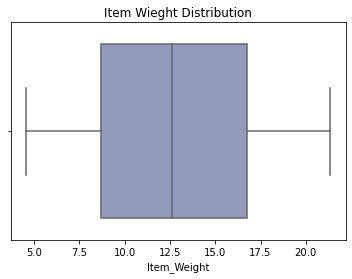

In [123]:
sns.boxplot(x=data['Item_Weight'], palette='BuPu')
plt.title('Item Wieght Distribution')

In [124]:
# imputate missing values in item weight
print('Missing Values in Item_Weight: ', len(data[data.Item_Weight.isnull()]))
miss_values = data.Item_Weight.isnull()
item_wt_avg = data.pivot_table(values='Item_Weight', index ='Item_Identifier')
data.loc[miss_values, 'Item_Weight'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_wt_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Weight'].isnull()))

Missing Values in Item_Weight:  2439
Missing values after filling:  0


In [125]:
#check info for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [126]:
#data1 = data.drop(["Item_Identifier", "Outlet_Identifier"], axis=1)
#Data_Profile = ProfileReport(data1)
#Data_Profile

In [127]:
# Numericals
num_df = data.select_dtypes('number')
# Categorial 
cat_df = data.select_dtypes('object')

In [128]:
# Lets Deal with catgorial Data First     
for col in cat_df.columns:
    if(col != 'Item_Identifier'):
        print('\nFrequency of Categories for varible %s'%col)
        print('\nTotal Categories: ', len(cat_df[col].value_counts()), '\n', cat_df[col].value_counts())


Frequency of Categories for varible Item_Fat_Content

Total Categories:  5 
 Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type

Total Categories:  16 
 Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Identifier

Total Categories:  10 
 OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019  

In [129]:
# Replace reapted values in Item_Fat_Content
data['Item_Fat_Content'] = data.Item_Fat_Content.replace(['LF', 'low fat', 'reg'],
                                                              ['Low Fat','Low Fat', 'Regular'])
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [130]:
# Combine Item_Type, and create new category
data['Item_Type_Combined'] = data.Item_Identifier.apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].replace(['FD','DR','NC'],
                                                                   ['Food','Drinks', 'Non-Consumable']) 
data.Item_Type_Combined.value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [131]:
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [132]:
# Lets deal with Numerical Data
num_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.793380,0.065953,141.004977,1997.830681,2181.288914
std,4.651716,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Text(0.5, 1.0, 'Item Outlet Sales Distribution')

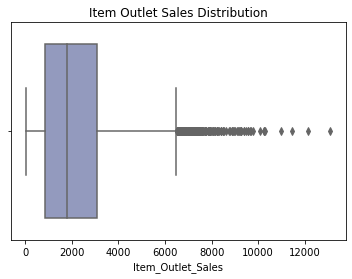

In [133]:
#Box plot for Item_Outlet_Sales to see outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution')

In [134]:
# Removing Outliers
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(data, "Item_Outlet_Sales")
print("Upper whisker: ",upper)
print("Lower Whisker: ",lower)
data = data[(data['Item_Outlet_Sales'] > lower) & (data['Item_Outlet_Sales'] < upper)]

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


Text(0.5, 1.0, 'Item Outlet Sales Distribution after removing outliers')

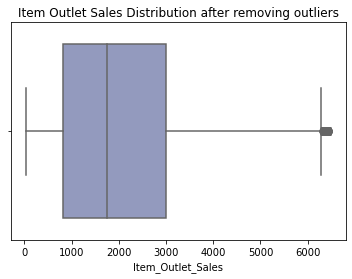

In [135]:
# Item_Outlet_Sales after removing Outliers
sns.boxplot(x=data['Item_Outlet_Sales'], palette='BuPu')
plt.title('Item Outlet Sales Distribution after removing outliers')

In [136]:
# change Establishment_Year to Outlet_Age
data['Oultet_Age'] = 2013 - data['Outlet_Establishment_Year']

In [137]:
# Lets consider 0 as missing value in Item_visibility
print('Missing Values in Item_Visibility: ', len(data[num_df['Item_Visibility'] == 0]))
miss_values = (data['Item_Visibility'] == 0)
item_vis_avg = data.pivot_table(values='Item_Visibility', index ='Item_Identifier')

data.loc[miss_values, 'Item_Visibility'] = data.loc[miss_values, 'Item_Identifier'].apply(lambda x:item_vis_avg.loc[x])
print('Missing values after filling: ' , sum(data['Item_Visibility'].isnull()))

Missing Values in Item_Visibility:  512
Missing values after filling:  0


In [138]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,14
3,FDX07,19.20,Regular,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train,Food,15
4,NCD19,8.93,Low Fat,0.008082,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,26


# Data Visualization

#### Univariate Plots
lets look at the countplots for categorial data

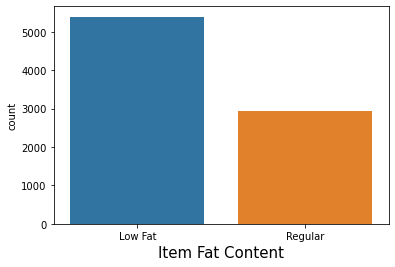

In [139]:
# Categorial Data
['Item_Identifier', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size',
'Outlet_Location_Type', 'Outlet_Type', 'Item_Type', 'Item_Type_Combined' ]

# CountPlot for Item_Fat_Content
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Fat_Content')
plt.xlabel('Item Fat Content', fontsize=15)
plt.show()


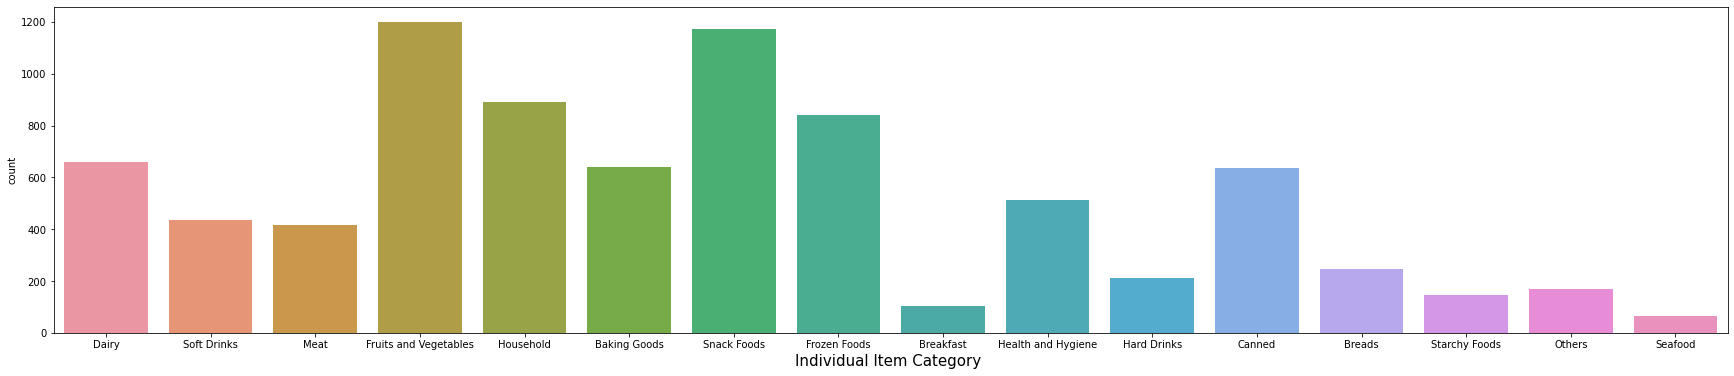

In [140]:
# CountPlot for Individual Item Category
plt.figure(figsize=(30,6))
sns.countplot(data=data, x='Item_Type')
plt.xlabel('Individual Item Category ', fontsize=15)
plt.show()

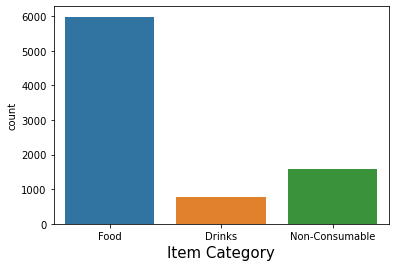

In [141]:
#  CountPlot for Item_Type_Combined
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Item_Type_Combined')
plt.xlabel('Item Category', fontsize=15)
plt.show()

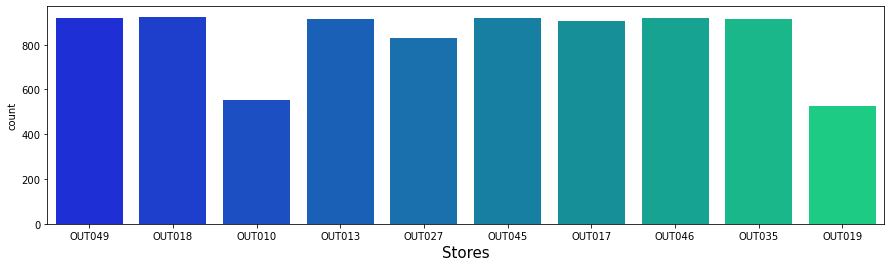

In [142]:
# CountPlot for Outlet_Identifier
plt.figure(figsize=(15,4))
sns.countplot(data=data, x='Outlet_Identifier', palette='winter')
plt.xlabel('Stores', fontsize=15)
plt.show()

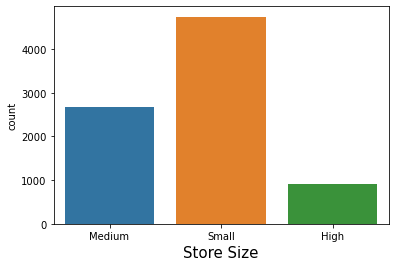

In [143]:
# CountPlot for Outlet_Size
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Outlet_Size')
plt.xlabel('Store Size', fontsize=15)
plt.show()

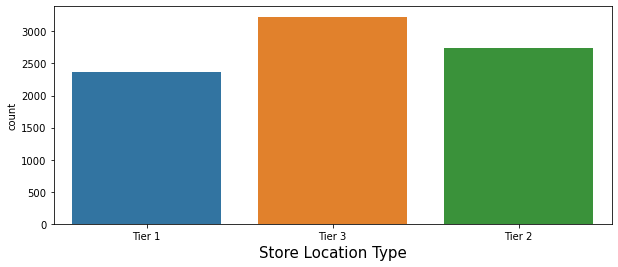

In [144]:
# CountPlot for Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.countplot(data=data, x='Outlet_Location_Type')
plt.xlabel('Store Location Type', fontsize=15)
plt.show()

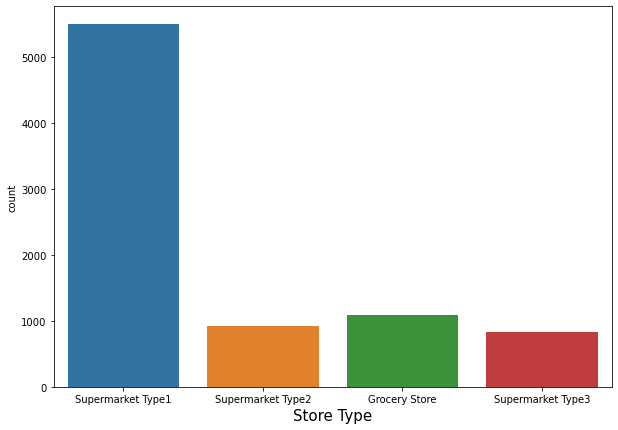

In [145]:
# CountPlot for Outlet_Type
plt.figure(figsize=(10,7))
sns.countplot(data=data, x='Outlet_Type')
plt.xlabel('Store Type', fontsize=15)
plt.show()
 

#### Realizations
Item_Fat_Content: Most Items sold are low Fat.
Item_Type: Distictly fruits & veg, food snacks are popular.
Item_Type_Combined: Most Sold Item cateogory is food.
Outlet_Identifier: Sold items are ditributed evenly amoung all stores, execpt OUT010 and OUT019.
Outlet_Size: Bigmart Stores are mostly in medium size in this data.
Outlet_Location_Type: Most comon type of location is Tier3
Outlet_Type: By a wide mergin Most Store Types are SuperMarket Type1.

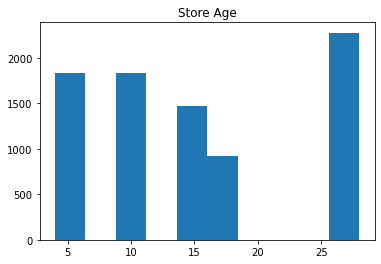

In [146]:
# For Numerical Data

# HistPlot for Outlet_Age
plt.hist(x=data['Oultet_Age'], )
plt.title('Store Age')
plt.show()

### Bivariate plots For Numeric.
Let's check following relationships

Sales per Item_MRP
Sales per Item_Visibility
Sales per Item_Weight

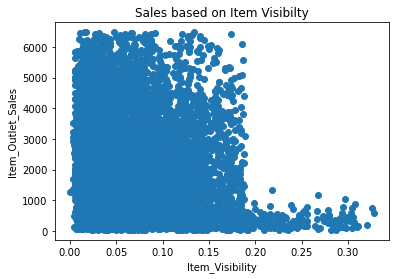

In [147]:
# ScatterPlot for Sales per Item_Visibilty
plt.scatter(data['Item_Visibility'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Visibilty')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

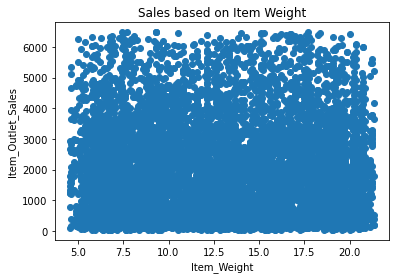

In [148]:
# ScatterPlot for Sales per Item_Weight
plt.scatter(data['Item_Weight'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item Weight')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

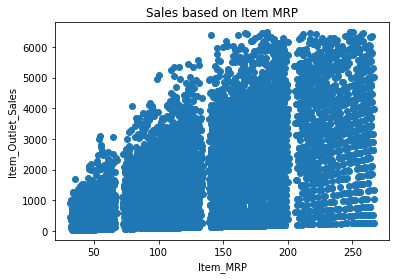

In [149]:
# ScatterPlot for Sales per Item_MRP
plt.scatter(data['Item_MRP'], data['Item_Outlet_Sales'])
plt.title('Sales based on Item MRP')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

#### Realizations
1)Item_Visibility: Looks like it has negative correlation.
2)Item_Weight: Not a particular Pattern, Data is very spreaded.
3)Item_MRP: Items with higer MRP Sales tends to sell better.

### Bivariate plots For Categorical.
Let's check following relationships

1)Sales per Item_Type_Combined
2)Sales per Outlet_Identifier
3)Sales per Outlet_Type
4)Sales per Outlet_Size
5)Sales per Outlet_Location_Type

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


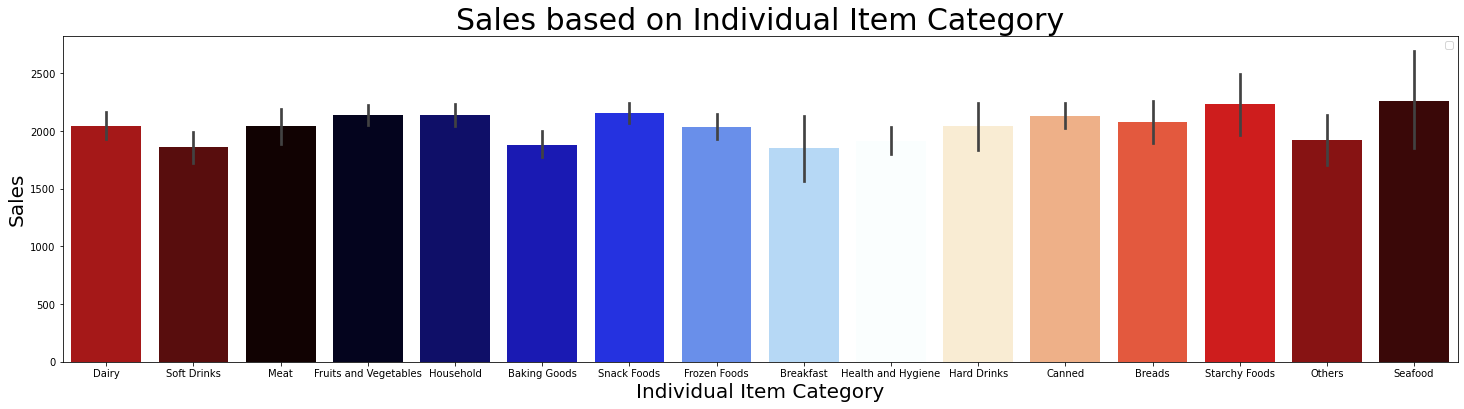

In [150]:
# BarPlot for Sales per Item_Type
plt.figure(figsize=(25,6))
sns.barplot(data=data,x='Item_Type', y='Item_Outlet_Sales', palette='flag')
plt.title('Sales based on Individual Item Category', fontsize=30)
plt.xlabel('Individual Item Category', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


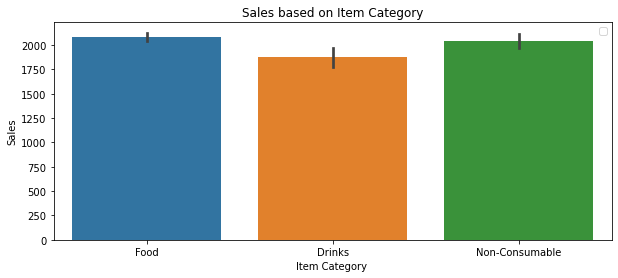

In [151]:
# BarPlot for Sales per Item_Type_Combined
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Item_Type_Combined', y='Item_Outlet_Sales')
plt.title('Sales based on Item Category')
plt.xlabel('Item Category ')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


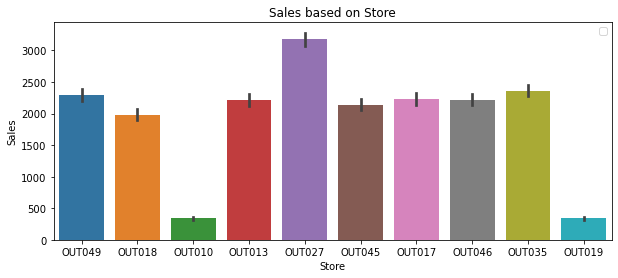

In [152]:
# BarPlot for Sales per Outlet_Identifier
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title('Sales based on Store')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


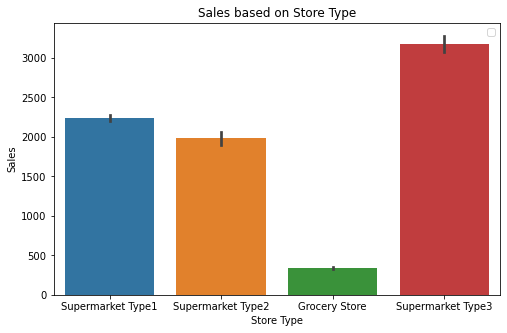

In [153]:
# BarPlot for Sales per Outlet_Type
plt.figure(figsize=(8,5))
sns.barplot(data=data,x='Outlet_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


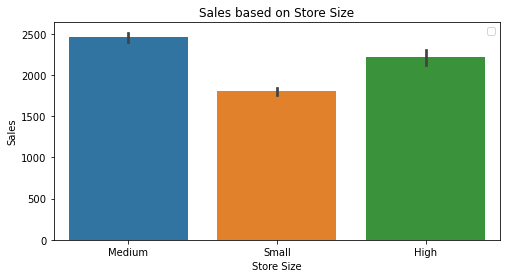

In [154]:
# BarPlot for Sales per Outlet_Size
plt.figure(figsize=(8,4))
sns.barplot(data=data,x='Outlet_Size', y='Item_Outlet_Sales')
plt.title('Sales based on Store Size')
plt.xlabel('Store Size')
plt.ylabel('Sales')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


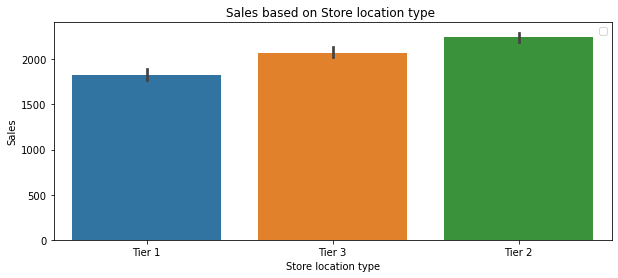

In [155]:
# BarPlot for Sales per Outlet_Location_Type
plt.figure(figsize=(10,4))
sns.barplot(data=data,x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title('Sales based on Store location type ')
plt.xlabel('Store location type')
plt.ylabel('Sales')
plt.legend()
plt.show()

#### Realizations:
1)Item_Type_Combined: Based on Categories, Food has most Sells, But difference is very small.
2)Outlet_Identifier: Outlet027 has most profitable, and Outlet019 and Outlet010 has least Sells.
3)Outlet_Type: Most Sells are through SuperMarket Type3 surprisingly not Type1.
4)Outlet_Size: Sells are mostly even in Medium and High size Stores.
5)Outlet_Location_Type: Most sells are through Tier3 and Tier2, Tier2 is slightly higher.

### Feature Engineering

In [156]:
#Label Encoding for Ordinal Data
le = LabelEncoder()
label = ['Item_Fat_Content', 'Outlet_Type', 'Outlet_Location_Type', 'Outlet_Size']
for i in label:
    data[i] = le.fit_transform(data[i])
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26


In [157]:


# Columns for applying One-Hot encoding
cols = ['Item_Type_Combined']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
data_oh = pd.DataFrame(OH_encoder.fit_transform(data[cols])).astype('int64')

# get feature columns
data_oh.columns = OH_encoder.get_feature_names_out(cols)

data_oh.index = data.index

 
data_fe = pd.concat([data, data_oh], axis=1)
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [158]:
data_fe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Oultet_Age,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380,train,Food,14,0,1,0
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228,train,Drinks,4,1,0,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700,train,Food,14,0,1,0
3,FDX07,19.20,1,0.015274,Fruits and Vegetables,182.0950,OUT010,1998,2,2,0,732.3800,train,Food,15,0,1,0
4,NCD19,8.93,0,0.008082,Household,53.8614,OUT013,1987,0,2,1,994.7052,train,Non-Consumable,26,0,0,1


In [159]:
# Drop irrlevent Columns
data_fe = data_fe.drop(['Item_Identifier','Item_Type_Combined', 'Outlet_Identifier','Oultet_Age',
                     'Item_Fat_Content','Item_Visibility', 'Item_Type','Item_Type_Combined',
                     'Outlet_Establishment_Year','Item_Type'], axis=1)
data_fe.head()

# Divide Data into train and test
train = data_fe.loc[data_fe['source']=="train"]
test = data_fe.loc[data_fe['source']=="test"]

train = train.drop('source', axis=1)
test = test.drop(['source',  'Item_Outlet_Sales'], axis=1)
# Check Datasets
print('\nTrain Dataset for Model Buidling: \n')
print(train.info(verbose=True, show_counts=True))
print('\nTest Dataset for Model Buidling: \n')
print(test.info(verbose=True, show_counts=True)) 
train.head()


Train Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8337 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Item_Weight                        8337 non-null   float64
 1   Item_MRP                           8337 non-null   float64
 2   Outlet_Size                        8337 non-null   int64  
 3   Outlet_Location_Type               8337 non-null   int64  
 4   Outlet_Type                        8337 non-null   int64  
 5   Item_Outlet_Sales                  8337 non-null   float64
 6   Item_Type_Combined_Drinks          8337 non-null   int64  
 7   Item_Type_Combined_Food            8337 non-null   int64  
 8   Item_Type_Combined_Non-Consumable  8337 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 651.3 KB
None

Test Dataset for Model Buidling: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries


,Item_Weight,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,9.30,249.8092,1,0,1,3735.1380,0,1,0
1,5.92,48.2692,1,2,2,443.4228,1,0,0
2,17.50,141.6180,1,0,1,2097.2700,0,1,0
3,19.20,182.0950,2,2,0,732.3800,0,1,0
4,8.93,53.8614,0,2,1,994.7052,0,0,1


### Modeling

Linear Regression

In [192]:
# Train and Test split
y = train['Item_Outlet_Sales']
X = train.drop('Item_Outlet_Sales', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20)
# Cross Validation Score after model completion
def cross_val(model, X, y, cv):
    scores = CVS(model, X, y, cv=cv)
    print(f'{model} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model} score: {round(scores.mean(),4)}')

In [193]:
# Model
model = LinearRegression(positive=True)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Metrics for Regression:
LR_MAE = MAE(y_test, y_predict)
LR_MSE = MSE(y_test, y_predict)
LR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Squared Mean Squared Error: {np.sqrt(LR_MSE)}\n")
print(f" R^2 Score: {LR_R_2}\n")

# Cross Validation Score check
cross_val(LinearRegression(),X,y,5)

 Mean Absolute Error: 850.5823478386704

 Squared Mean Squared Error: 1097.6757526956542

 R^2 Score: 0.4576702293384278

LinearRegression() Scores:
0.48
0.49
0.46
0.48
0.48
Average LinearRegression() score: 0.4778


Item_Weight                            0.000000
Outlet_Size                            0.000000
Outlet_Location_Type                   0.000000
Item_Type_Combined_Non-Consumable      0.000000
Item_Type_Combined_Drinks              3.412048
Item_MRP                              13.868597
Item_Type_Combined_Food               78.441599
Outlet_Type                          769.806360
dtype: float64


<AxesSubplot:>

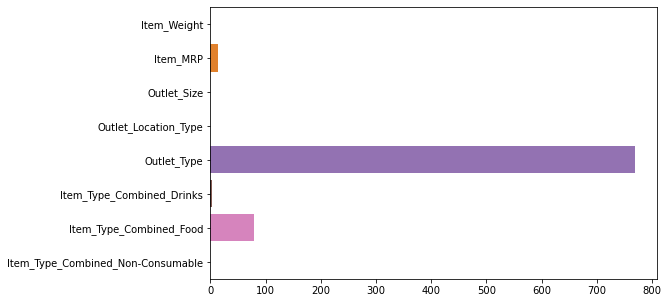

In [196]:
# vasulization of model's perfomance
LR_coef = pd.Series(model.coef_, model.feature_names_in_).sort_values()
print(LR_coef)
plt.figure(figsize=(8,5))
sns.barplot(x=model.coef_ , y = model.feature_names_in_)

#### RandomForest

In [174]:
from sklearn.ensemble import RandomForestRegressor
# Model
model = RandomForestRegressor(n_estimators=400, max_depth=6, min_samples_leaf=100, n_jobs=4, random_state=101)

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrics
RFR_MAE = MAE(y_test, y_predict)
RFR_MSE = MSE(y_test, y_predict)
RFR_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RandomForestRegressor(),X, y, 5)

 Mean Absolute Error: 718.1273348955266

 Mean Squared Error: 945500.1707830498

 R^2 Score: 0.5744242089133027

RandomForestRegressor() Scores:
0.51
0.51
0.48
0.53
0.53
Average RandomForestRegressor() score: 0.5114


Outlet_Type                          0.656383
Item_MRP                             0.135247
Item_Type_Combined_Drinks            0.048880
Item_Type_Combined_Non-Consumable    0.034884
Outlet_Size                          0.033279
Item_Type_Combined_Food              0.032013
Outlet_Location_Type                 0.031630
Item_Weight                          0.027684
dtype: float32


<AxesSubplot:>

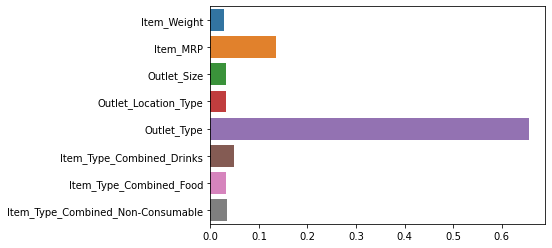

In [188]:
# vasulization of model's perfomance
RFR_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(RFR_coef)
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

#### XGBoost

In [182]:
from xgboost import XGBRegressor

# Model
model = XGBRegressor()

# Fit
model.fit(X_train, y_train)

# Predict
y_predict = model.predict(X_test)

# Score Matrix
XG_MAE = MAE(y_test, y_predict)
XG_MSE = MSE(y_test, y_predict)
XG_R_2 = R2(y_test, y_predict)
print(f" Mean Absolute Error: {XG_MAE}\n")
print(f" Mean Squared Error: {XG_MSE}\n")
print(f" R^2 Score: {XG_R_2}\n")
cross_val(XGBRegressor(),X, y, 5)

 Mean Absolute Error: 761.9328402504542

 Mean Squared Error: 1071171.3149916385

 R^2 Score: 0.5178588075881532

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) Scores:
0.54
0.52
0.48
0.53
0.53
Average XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsamp

Outlet_Type                          0.656383
Item_MRP                             0.135247
Item_Type_Combined_Drinks            0.048880
Item_Type_Combined_Non-Consumable    0.034884
Outlet_Size                          0.033279
Item_Type_Combined_Food              0.032013
Outlet_Location_Type                 0.031630
Item_Weight                          0.027684
dtype: float32


<AxesSubplot:>

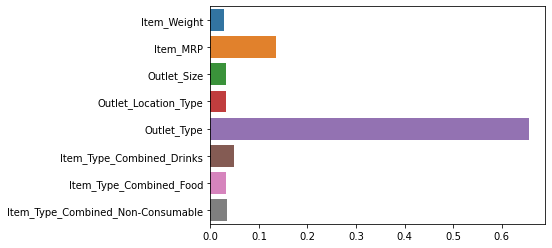

In [185]:
# vasulization of model's perfomance
XG_coef = pd.Series(model.feature_importances_, model.feature_names_in_).sort_values(ascending=False)
print(XG_coef)
sns.barplot(x = model.feature_importances_, y = model.feature_names_in_)